In [21]:
import numpy as np
import sympy as sym
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 

In [22]:
#システムパラメータを与える
A = np.array([[0.0,1.0], [-6.0,-5.0]]) #行列A
b = np.array([[0.0], [1.0] ])#ベクトルb
c = np.array([[1.0, 0.0]]) #ベクトルc
d = 0 #スカラーd
observer_poles2=[-5,-6]  #オブザーバの極
h2 = matlab.place(A.T, c.T, observer_poles2).T #オブザーバゲインを求める
Ah2 = A - h2*c  #Ah = A-hcの計算

In [23]:
poles = [-5.0, -6.0] #閉ループシステムの極の指定
f = matlab.place(A, b, poles) #フィードバックゲインを求める
print("feedback gain =", f) #フィードバックゲインの表示

feedback gain = [[ 24.   6.]]


In [24]:
Af = A - b*f  #Af = A-bfの計算
cp = np.array([[1.0, 0.0],[0.0,1.0]])#x_{1}とx_{2}をプロットするためにcを単位行列にする
dp = np.array([[0.0],[0.0]])#Cに合わせてdを零ベクトルとする
sys_s_fbk = matlab.ss(Af, b, cp, dp) #フィードバック系の状態空間表現を求める
(y_s_fbk, t_s_fbk) = matlab.initial(sys_s_fbk, X0 = np.array([[1.0],[1.0]]), T = arange(0, 5, 0.01)) #フィードバック系の初期値応答を求める

In [25]:
 #併合システム(12.13)式を作る
E21 = np.concatenate((Af, -b*f), axis=1)
E22 = np.concatenate((np.zeros((2,2)),Ah2), axis=1)
E2= np.concatenate((E21,E22), axis=0)

bp = np.array([[0.0],[0.0],[0.0],[1.0]])
cp = np.eye(4)#x_{1}とx_{2}をプロットするためにcを単位行列にする
dp = np.array([[0.0],[0.0],[0.0],[0.0]])#Cに合わせてdを零ベクトルとする
e_sys2 = matlab.ss(E2, bp, cp, dp) #併合システムの状態空間表現を求める

In [26]:
#併合システムの初期値応答を求める
(e_s_s2, te2) = matlab.initial(e_sys2, X0 = np.array([[1.0],[1.0],[-1.0],[-1.0]]), T = arange(0, 5, 0.01))
h_x_2_1 = e_s_s2[:,2] + e_s_s2[:,0]
h_x_2_2 = e_s_s2[:,3] + e_s_s2[:,1]

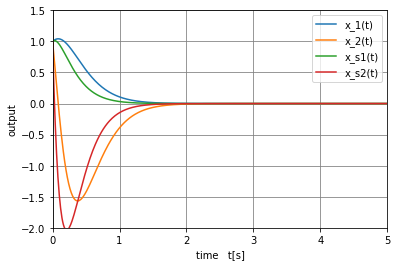

In [27]:
# 図12.3(a)の描画
plt.plot(te2, e_s_s2[:,0], label = "x_1(t)")#併合システムにおける{x}_{1}を抽出してplotする
plt.plot(te2, e_s_s2[:,1], label = "x_2(t)")#併合システムにおける{x}_{2}を抽出してplotする
plt.plot(t_s_fbk, y_s_fbk[:,0], label = "x_s1(t)")#状態フィードバックにおけるx_{1}を抽出してplotする
plt.plot(t_s_fbk, y_s_fbk[:,1], label = "x_s2(t)")#状態フィードバックにおけるx_{2}を抽出してplotする
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.ylim([-2.0, 1.5]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

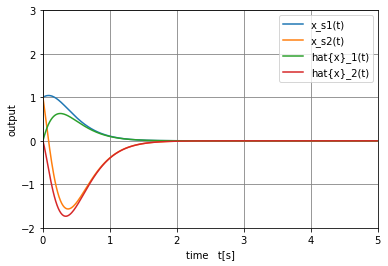

In [28]:
# 図12.3(b)の描画
plt.plot(te2, e_s_s2[:,0], label = "x_s1(t)")#状態フィードバックにおけるx_{1}を抽出してplotする
plt.plot(te2, e_s_s2[:,1], label = "x_s2(t)")#状態フィードバックにおけるx_{2}を抽出してplotする
plt.plot(te2, h_x_2_1, label = "hat{x}_1(t)")#併合システムにおける{{x}_{1}を抽出してplotする
plt.plot(te2, h_x_2_2, label = "hat{x}_2(t)")#併合システムにおける{{x}_{2}を抽出してplotする
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.ylim([-2.0, 3.0]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示